In [1]:
import os
import pandas as pd
import numpy as np
import json
import re
import matplotlib.pyplot as plt

In [2]:
set_model_results = {}
PATH_NAIVE = './output/1-dictionary-naive-search'
PATH_CMS = './output/2-count-min-sketch+bloom_freq'
PATH_DEEZY = './output/3-deezy-alg'
for i in range(10):
    set_model_results[f"naive_{i}"] = pd.read_csv(f"{PATH_NAIVE}/dataset_{i}.csv", index_col=0)
    set_model_results[f"cms_{i}"] = pd.read_csv(f"{PATH_CMS}/dataset_{i}.csv", index_col=0)
    set_model_results[f"deezy_{i}"] = pd.read_csv(f"{PATH_DEEZY}/dataset_{i}.csv", index_col=0)

In [4]:
dict_matches = {}
list_indexes = list(set_model_results['naive_0'].index.values)
for dataset_key, dataset in set_model_results.items():
    dict_matches[dataset_key] = dataset.loc[:,'matched_words']
pd_matches = pd.DataFrame(dict_matches, index=list_indexes)

pd_matches

,naive_0,cms_0,deezy_0,naive_1,cms_1,deezy_1,naive_2,cms_2,deezy_2,naive_3,...,deezy_6,naive_7,cms_7,deezy_7,naive_8,cms_8,deezy_8,naive_9,cms_9,deezy_9
I,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
an,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
and,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
apple,appeal,appeal,"{'appealed', 'papel'}",appeal,appeal,{'appealed'},appeal,appeal,"{'citadel', 'appice'}",appeal,...,"{'appealed', 'applied'}",appeal,appeal,"{'appealed', 'cappelen'}",appeal,appeal,"{'papel', 'apoel'}",NaN,NaN,"{'appealed', 'padel'}"
banana,"{'brannan', 'anna', 'annandale'}","{'annandale', 'brannan', 'anna'}","{'bandanna', 'nabāto'}","{'banana', 'anna', 'santana'}","{'santana', 'banana', 'anna'}","{'banana', 'nana'}","{'ananda', 'bannau', 'annan', 'tanana'}","{'ananda', 'bannau', 'tanana', 'annan'}","{'banana', 'three-month'}",anna,...,"{'banana', 'bandwidth'}","{'annandale', 'annapurna', 'anna', 'annang'}","{'annandale', 'annang', 'annapurna', 'anna'}","{'rana', 'anandamath'}","{'anna', 'tanana', 'hannan'}","{'hannan', 'tanana', 'anna'}","{'nana', 'bandana'}","{'bandanna', 'banana', 'annandale', 'anna', 'a...","{'banana', 'annan', 'anna', 'annandale', 'band...","{'bandanna', 'nana'}"
don't,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
error,"{'error', 'errors', 'terror'}","{'errors', 'error', 'terror'}","{'r', 'error'}","{'herro', 'herron', 'error'}","{'error', 'herro', 'herron'}",{'error'},"{'error', 'cerro'}","{'cerro', 'error'}",{'error'},"{'error', 'errol'}",...,"{'error', 'redo'}","{'fierro', 'terror'}","{'fierro', 'terror'}","{'redmond', 'error'}",error,error,{'error'},error,error,"{'fervor', 'error'}"
have,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hope,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
pd_matches = pd_matches.loc[pd_matches[pd_matches != 'NaN'].any(axis=1)]

In [6]:
pd_matches

,naive_0,cms_0,deezy_0,naive_1,cms_1,deezy_1,naive_2,cms_2,deezy_2,naive_3,...,deezy_6,naive_7,cms_7,deezy_7,naive_8,cms_8,deezy_8,naive_9,cms_9,deezy_9
apple,appeal,appeal,"{'appealed', 'papel'}",appeal,appeal,{'appealed'},appeal,appeal,"{'citadel', 'appice'}",appeal,...,"{'appealed', 'applied'}",appeal,appeal,"{'appealed', 'cappelen'}",appeal,appeal,"{'papel', 'apoel'}",NaN,NaN,"{'appealed', 'padel'}"
banana,"{'brannan', 'anna', 'annandale'}","{'annandale', 'brannan', 'anna'}","{'bandanna', 'nabāto'}","{'banana', 'anna', 'santana'}","{'santana', 'banana', 'anna'}","{'banana', 'nana'}","{'ananda', 'bannau', 'annan', 'tanana'}","{'ananda', 'bannau', 'tanana', 'annan'}","{'banana', 'three-month'}",anna,...,"{'banana', 'bandwidth'}","{'annandale', 'annapurna', 'anna', 'annang'}","{'annandale', 'annang', 'annapurna', 'anna'}","{'rana', 'anandamath'}","{'anna', 'tanana', 'hannan'}","{'hannan', 'tanana', 'anna'}","{'nana', 'bandana'}","{'bandanna', 'banana', 'annandale', 'anna', 'a...","{'banana', 'annan', 'anna', 'annandale', 'band...","{'bandanna', 'nana'}"
error,"{'error', 'errors', 'terror'}","{'errors', 'error', 'terror'}","{'r', 'error'}","{'herro', 'herron', 'error'}","{'error', 'herro', 'herron'}",{'error'},"{'error', 'cerro'}","{'cerro', 'error'}",{'error'},"{'error', 'errol'}",...,"{'error', 'redo'}","{'fierro', 'terror'}","{'fierro', 'terror'}","{'redmond', 'error'}",error,error,{'error'},error,error,"{'fervor', 'error'}"
jerusalem,jerusalem,jerusalem,"{'describes', 'jerusalem'}","{'jersey', 'jeremy', 'realm'}","{'realm', 'jeremy', 'jersey'}","{'veljanovski', 'jerusalem'}",jerusalem,jerusalem,"{'jerisheh', 'jerusalem'}","{'jerusalem', 'realm'}",...,{'jerusalem'},jerusalem,jerusalem,"{'déclais', 'jerusalem'}",jerusalem,jerusalem,"{'jerisheh', 'jerusalem'}","{'jeremy', 'realm'}","{'realm', 'jeremy'}","{'describes', 'jerusalem'}"
lemon,"{'leone', 'lemon'}","{'lemon', 'leone'}","{'leonie', 'lemon'}","{'lemonade', 'leon', 'lemon', 'lemond', 'leone'}","{'lemon', 'leone', 'lemonade', 'lemond', 'leon'}","{'leone', 'llwyndyrys'}",lemon,lemon,"{'leone', 'leonard'}","{'leonie', 'lone', 'leone'}",...,"{'lemmers', 'leone'}","{'leone', 'lemond', 'lemon'}","{'lemon', 'leone', 'lemond'}","{'leone', 'lemmon'}",leone,leone,"{'lermond', 'leone'}","{'lemonade', 'lemore', 'leone'}","{'lemonade', 'leone', 'lemore'}","{'leonards', 'leone'}"
london,london,london,"{'london', 'longwy'}",london,london,"{'london', 'olof'}",london,london,{'london'},london,...,"{'london', 'dudgeon'}",london,london,{'london'},london,london,{'london'},london,london,{'london'}
pear,paper,paper,"{'parameter', 'parker'}",paper,paper,"{'parameter', 'parker'}",paper,paper,"{'parameter', 'parker'}",paper,...,"{'parameter', 'parker'}",paper,paper,"{'parameter', 'parker'}",paper,paper,"{'parameter', 'parker'}",paper,paper,"{'parameter', 'parker'}"
please,please,please,"{'settles', 'spieletester.com'}",please,please,"{'settles', ""stallion's""}",please,please,"{'peeresses', 'safeties'}",please,...,"{'peeresses', 'pleas'}",please,please,"{'spiders', 'lipstick'}",please,please,{'settles'},please,please,"{'settles', 'tickets'}"
possible,possible,possible,"{'ps', 'pose'}",possible,possible,"{'superimposed', 'spoiling'}",possible,possible,"{'pooja', 'superimposed'}",possible,...,"{'postulates', 'superimposed'}",possible,possible,"{'superimposed', 'polish–lithuanian'}",possible,possible,"{'polish–lithuanian', 'pose'}",possible,possible,"{'superimposed', 'pose'}"
wanna,anna,anna,{'wanna'},"{'wanna', 'anna'}",NaN,{'wanna'},NaN,NaN,NaN,"{'wanna', 'anna'}",...,"{'hanna', 'hyena'}","{'anna', 'nwanna'}","{'nwanna', 'anna'}","{'hanna', 'wanna'}",anna,anna,"{'hanna', 'hyena'}",NaN,NaN,NaN


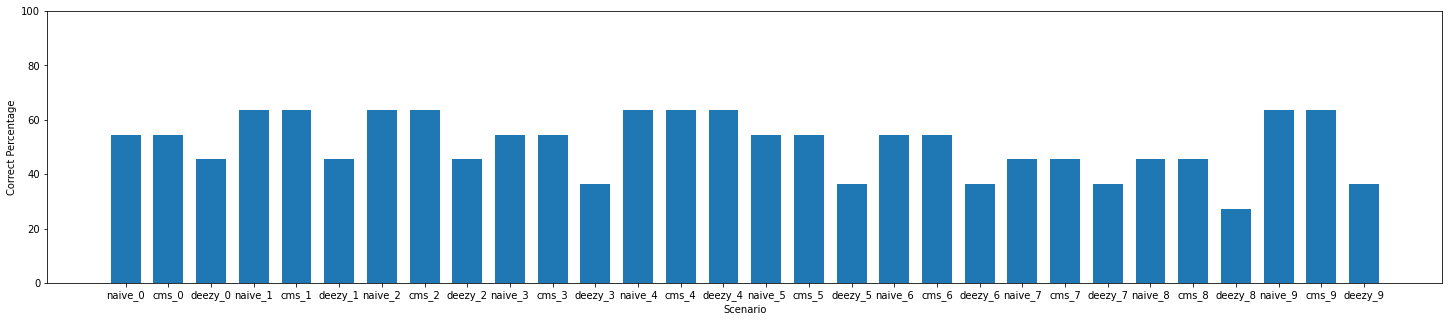

In [7]:
diff_series = {}
original_words = list(pd_matches.index.values)
diff_matches_all = []
for series_name, series in pd_matches.items():
  #print(list(series.index))
  diff_matches = [{word:series[word]} for word in list(series.index)]
  diff_matches_all.append(diff_matches)
  diff_matches = [{word:series[word]} for word in list(series.index) if 
       (type(series[word]) == str and not series[word].startswith('{') and word != series[word]) or
       (type(series[word]) == str and series[word].startswith('{') and word not in [re.sub(r'\W+', '', subword) for subword in series[word].split(",")])]
  diff_series[series_name] = 100 * (1 - (len(diff_matches) / len(series.values)))
plt.figure(figsize=(25, 5))  # width:20, height:3
plt.bar(diff_series.keys(), diff_series.values(), align='center', width=0.7)
plt.xlabel('Scenario')
plt.ylabel('Correct Percentage')
ax = plt.gca()
ax.set_ylim([0, 100])
plt.show()

In [8]:
dict_diffes = {}
for word in original_words:
    dict_diffes[word] = []

for diff_match in diff_matches_all:
    for diff in diff_match:
        diff_match_key = list(diff.keys())[0]
        diff_match_value = list(diff.values())[0]
        if type(diff_match_value) != str:
            dict_diffes[diff_match_key] = []
        elif not diff_match_value.startswith('{'):
            dict_diffes[diff_match_key].append(diff_match_value)
        else:
            diff_match_values = [re.sub(r'\W+', '', subword) for subword in diff_match_value.split(",")]
            dict_diffes[diff_match_key].extend(diff_match_values)
            
# Unique parameters
dict_diffes = {k: set(v) for k, v in dict_diffes.items()}
dict_diffes
dict_diffes_max_len = max(len(v) for k, v in dict_diffes.items())
dict_diffes_new = {k: ['---' for i in range(dict_diffes_max_len)] for k, v in dict_diffes.items()}
for k, v in dict_diffes_new.items():
  for idx, item in enumerate(dict_diffes[k]):
      dict_diffes_new[k][idx] = item
dict_diffes_new

dict_diffes_df = pd.DataFrame(dict_diffes_new)
dict_diffes_df

,apple,banana,error,jerusalem,lemon,london,pear,please,possible,wanna,watermelon
0,padel,nana,fervor,jerusalem,lemon,london,paper,settles,postulates,---,rae
1,appealed,rana,errors,jerisheh,leonards,longwy,parker,spiders,subtypes,---,warned
2,---,tanana,cerro,realm,lemore,olof,parameter,leases,spoiling,---,trawled
3,---,anynana,erros,déclais,lemonier,dudgeon,practiquer,peeresses,possible,---,waterman
4,---,santana,formed,jersey,llwyndyrys,---,---,tickets,pose,---,afterelton
5,---,banana,r,veljanovski,limone,---,---,please,pooja,---,arterton
6,---,anhydrous,herro,describe,leonie,---,---,lipstick,polishlithuanian,---,arteron
7,---,hannan,herron,describes,lerone,---,---,pleas,superimposed,---,warranted
8,---,bannan,terror,jeremy,leemon,---,---,---,suppressed,---,qara
9,---,brannan,fierro,---,lemonade,---,---,---,ps,---,waterhen


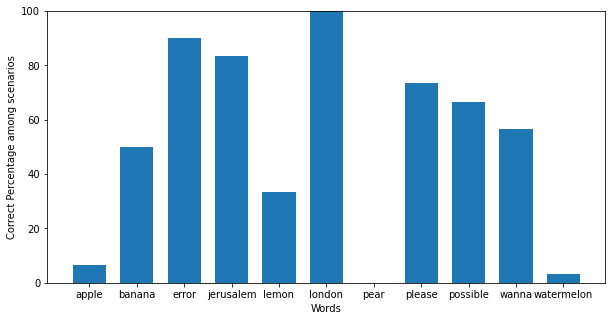

In [9]:
diff_series_by_word = {}
original_words = pd_matches.index
for index_name, row in pd_matches.iterrows():
  #diff_words = [x for x in row if x != index_name]
  diff_words = [fix for fix in list(row) if 
       (type(fix) == str and not fix.startswith('{') and index_name != fix) or
       (type(fix) == str and fix.startswith('{') and index_name not in [re.sub(r'\W+', '', subword) for subword in fix.split(",")])]
  diff_series_by_word[index_name] = 100 * (1 - (len(diff_words) / len(row)))

#diff_series_df = pd.Series(diff_series)
plt.figure(figsize=(10, 5))  # width:20, height:3
plt.bar(diff_series_by_word.keys(), diff_series_by_word.values(), align='center', width=0.7)
plt.xlabel('Words')
plt.ylabel('Correct Percentage among scenarios')
ax = plt.gca()
ax.set_ylim([0, 100])
plt.show()

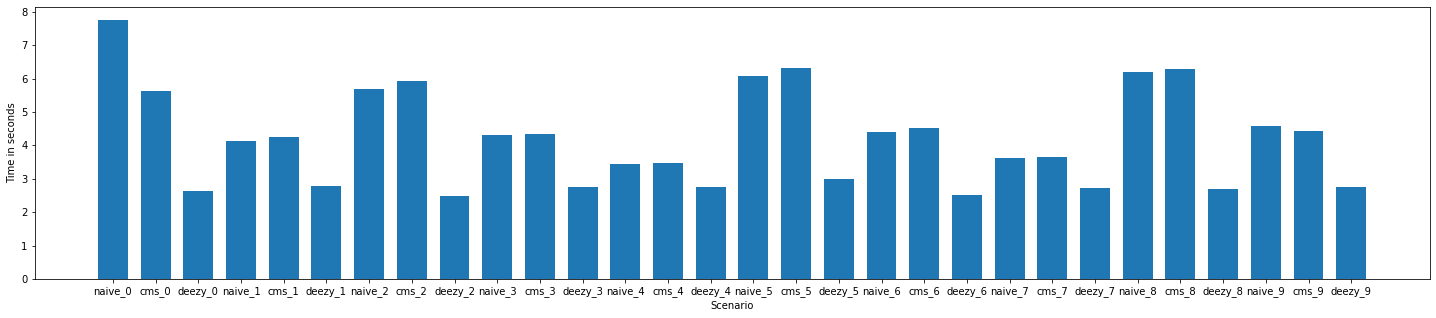

In [10]:
dict_times = {}
list_indexes = list(set_model_results['naive_0'].index.values)
for dataset_key, dataset in set_model_results.items():
    dict_times[dataset_key] = dataset.iloc[0]['time_sec']
pd_times = pd.DataFrame(dict_times, index=[0])

plt.figure(figsize=(25, 5))  # width:20, height:3
plt.bar(pd_times.columns, pd_times.iloc[0], align='center', width=0.7)
plt.xlabel('Scenario')
plt.ylabel('Time in seconds')
ax = plt.gca()
plt.show()

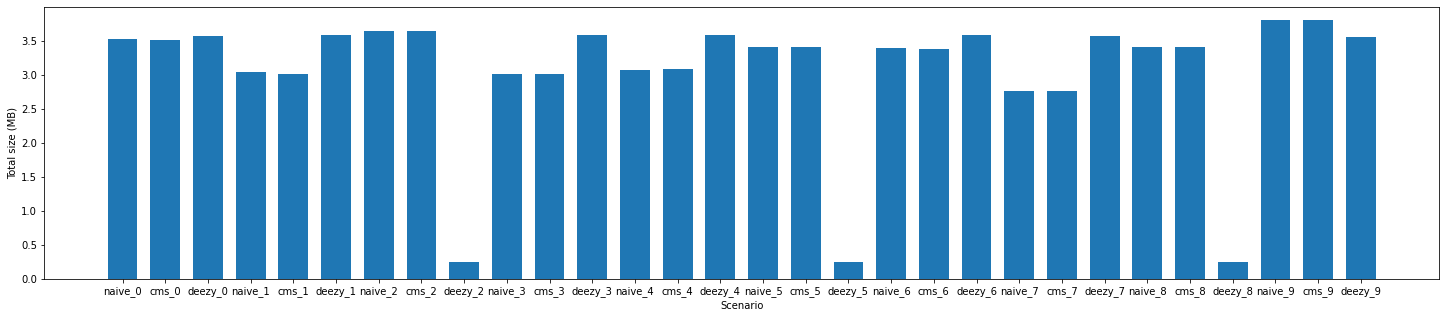

In [11]:
dict_mem = {}
list_indexes = list(set_model_results['naive_0'].index.values)
for dataset_key, dataset in set_model_results.items():
    dict_mem[dataset_key] = dataset.iloc[0]['total_memory_mb']
pd_mem = pd.DataFrame(dict_mem, index=[0])

plt.figure(figsize=(25, 5))  # width:20, height:3
plt.bar(pd_mem.columns, pd_mem.iloc[0], align='center', width=0.7)
plt.xlabel('Scenario')
plt.ylabel('Total size (MB)')
ax = plt.gca()
plt.show()

Measuring Memory VS Performance


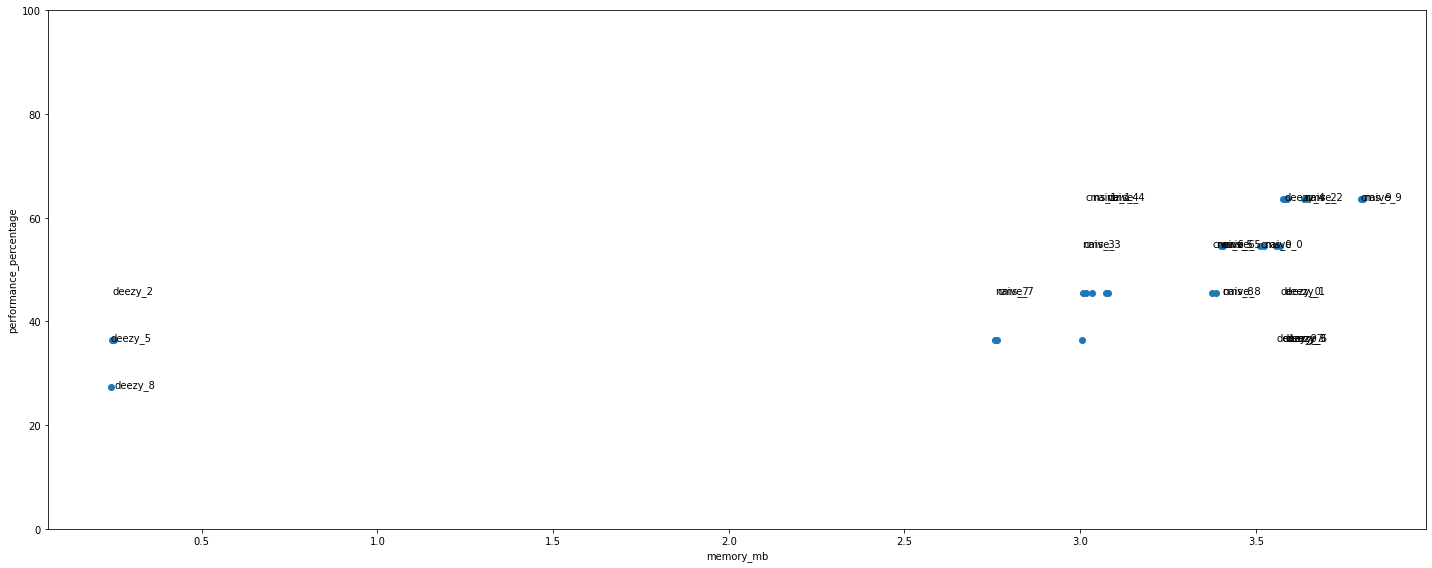

In [12]:
print("Measuring Memory VS Performance")

memory_per_scenario = pd.Series(dict_mem).sort_values(ascending=False)
performance_per_scenario = pd.Series(diff_series).sort_values(ascending=False)

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111)
plt.scatter(memory_per_scenario.values, performance_per_scenario.values)
plt.xlabel('memory_mb')
plt.ylabel('performance_percentage')

for scenario in list(memory_per_scenario.index):
    ax.text(memory_per_scenario[scenario], performance_per_scenario[scenario], scenario)
ax.set_ylim([0, 100])

plt.tight_layout()